# Clothes Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of Lab 2 on SVM: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [32]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.23.2


In [33]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generatoryour (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [34]:
ID = 2025167 # la mia matricola invece è 2025168
np.random.seed(ID)

In [35]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [36]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labelsT)
print("Frequencies in test set: ", freqsT)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [53 55 74 59 73 43 73 57 51 62]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [393 391 413 394 406 400 420 407 400 376]


In [37]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


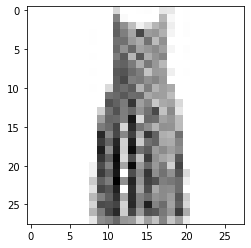

LABEL: 3
INPUT:


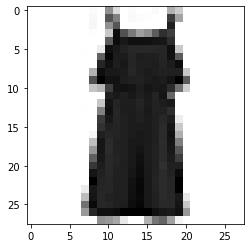

LABEL: 3
INPUT:


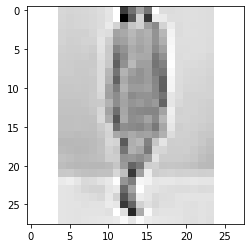

LABEL: 3


In [38]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [39]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes':[(10,), (20,), (30,), (30,20,), (30,40,), (30,30,20), (30,30,30), (30,30,40)]}

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)
# utilizzo la funzione gridsearchcv per confrontare i vari set di parametri che possiamo usare nel NN con una cross validation cv=5
grid_hl = GridSearchCV(mlp, parameters, cv=5)
grid_hl.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:\n", grid_hl.best_params_)

print("Score with best parameters:\n", grid_hl.best_score_)

print("All scores on the grid:\n", grid_hl.cv_results_['mean_test_score'])


RESULTS FOR NN

Best parameters set found:
 {'hidden_layer_sizes': (30,)}
Score with best parameters:
 0.7766666666666666
All scores on the grid:
 [0.47 0.77 0.78 0.69 0.72 0.63 0.61 0.62]


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [40]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters_batch = {'batch_size': [1, 32, 64, 128, 200, 480]}
mlp_batch = MLPClassifier(hidden_layer_sizes= grid_hl.best_params_['hidden_layer_sizes'], max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=.1)
# è necessario specificare inoltre che mlp da utilizzare in questo caso è quello contenente i migliori parametri trovati nella precedente grid search, cioè il numero di hidden layers e neuroni che conduce al minor training error

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)
grid_batch = GridSearchCV(mlp_batch, parameters_batch, cv=kf)
grid_batch.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:\n", grid_batch.best_params_)

print("Score with best parameters:\n", grid_batch.best_score_)

print("All scores on the grid:\n", grid_batch.cv_results_['mean_test_score'])

RESULTS FOR NN

Best parameters set found:
 {'batch_size': 200}
Score with best parameters:
 0.8016666666666667
All scores on the grid:
 [0.09 0.73 0.8  0.78 0.8  0.78]


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

### Answer the question
Dalla teoria sappiamo che un NN con un singolo layer è in grado di implementare ogni tipo di funzione booleana da $\{\pm 1\}^n$ a $\{\pm 1\}$. Nel nostro caso, nonostante il problema non possa essere descritto da una funzione di classificazione binaria del tipo di cui sopra, mantenendo un singolo layer ma aumentando il numero di neuroni al suo interno si è in grado di allenare meglio l'algoritmo. Si ottiene infatti uno score fino a $\approx 0.76$ con 30 neuroni in un solo e unico hidden layer. Quando però si aggiungono altri layer aumenta eccessivamente la complessità del network provocando la diminuizione dell'accuracy fino a raggiungere $\approx 0.5$ per tre hidden layers con 30 neuroni nei primi due e 10 nell'ultimo.

Per quanto riguarda l'andamento del validation error in funzione delle batch sizes si nota che: 

inizialmente il validation error diminuisce all'aumentare della dimensione dei batch. Quando invece si raggiungono 480 samples allora l'algoritmo di SGD si riconduce al caso limite di GD. Il GD non ottiene il peggiore score ma si abbassa rispetto a quello ottenuto con 200 samples nei batch. Il GD è più stabile ma meno performante di SGD il quale al contrario manifesta maggiore instabilità (mean square error più grande). Il parametro ottimale si ottiene quando troviamo un compromesso tra i due algoritmi per 200 samples nei batch.

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 300 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 0.34 sec

Training MLP of size (20,) ...
Done, training time: 0.53 sec

Training MLP of size (30,) ...
Done, training time: 0.30 sec

Training MLP of size (30, 20) ...
Done, training time: 0.22 sec

Training MLP of size (30, 40) ...
Done, training time: 0.23 sec

Training MLP of size (30, 30, 20) ...
Done, training time: 0.36 sec

Training MLP of size (30, 30, 30) ...
Done, training time: 0.33 sec

Training MLP of size (30, 30, 40) ...
Done, training time: 0.59 sec



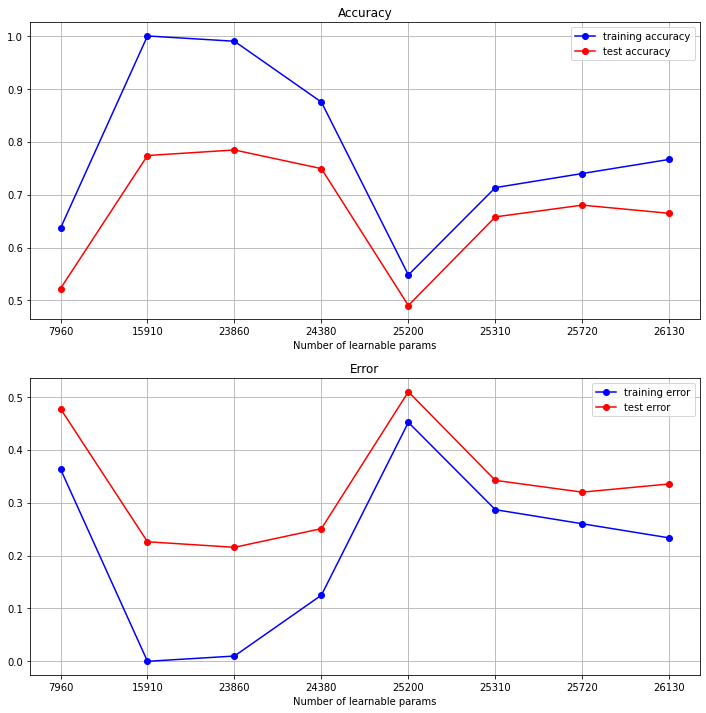

In [41]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (30,), (30,20,), (30,40,), (30,30,20), (30,30,30), (30,30,40)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(hidden_layer_sizes=hl_size , batch_size=grid_batch.best_params_['batch_size'] ,max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=.1)  
    
    mlp.fit(X_train,y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(2,1, figsize=(12,12))


ax[0].plot(train_acc_list, '-bo', label = 'training accuracy')
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)
ax[0].plot(test_acc_list, '-ro', label = 'test accuracy') 
ax[0].legend()

ax[1].plot(np.ones(len(train_acc_list))-np.array(train_acc_list), '-bo', label = 'training error')
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Error')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)
ax[1].plot(np.ones(len(test_acc_list))-np.array(test_acc_list), '-ro', label = 'test error')
ax[1].legend()

### Training e test error con 10k samples nel training set e 50k nel test set 

In [42]:
X_more_more = X[permutation]
y_more_more = y[permutation]

m_training_more_more = 10000

X_train_more_more, X_test_more_more = X_more_more[:m_training_more_more], X_more_more[m_training_more_more:]
y_train_more_more, y_test_more_more = y_more_more[:m_training_more_more], y_more_more[m_training_more_more:]

labels_more_more, freqs_more_more = np.unique(y_train_more_more, return_counts=True)
print("Labels in training dataset: ", labels_more_more)
print("Frequencies in training dataset: ", freqs_more_more)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [ 961  987 1039 1005  982  989 1020 1056  966  995]


Training MLP of size (10,) ...
Done, training time: 4.54 sec

Training MLP of size (20,) ...
Done, training time: 8.09 sec

Training MLP of size (30,) ...
Done, training time: 11.46 sec

Training MLP of size (30, 20) ...
Done, training time: 8.19 sec

Training MLP of size (30, 40) ...
Done, training time: 12.59 sec

Training MLP of size (30, 30, 20) ...
Done, training time: 11.73 sec

Training MLP of size (30, 30, 30) ...
Done, training time: 10.75 sec

Training MLP of size (30, 30, 40) ...
Done, training time: 9.06 sec



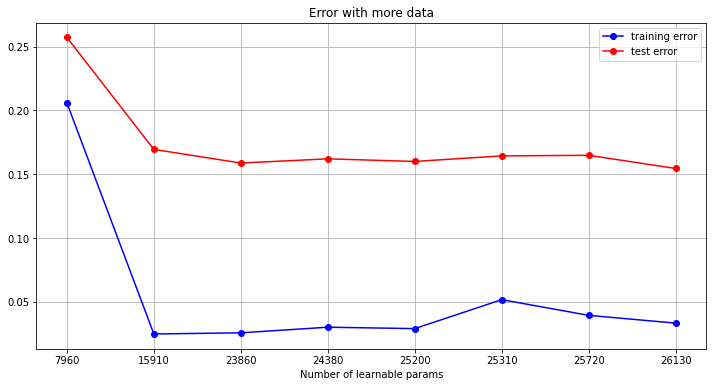

In [43]:
hl_sizes_more = [(10,), (20,), (30,), (30,20,), (30,40,), (30,30,20), (30,30,30), (30,30,40)]
hl_labels_more = [param_count(t) for t in hl_sizes_more]

ti = time.time()
train_acc_list_more, test_acc_list_more = [], []
for hl_size in hl_sizes_more:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(hidden_layer_sizes=hl_size , batch_size=grid_batch.best_params_['batch_size'] ,max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=.1)  
    
    mlp.fit(X_train_more_more,y_train_more_more)
    
    train_acc_list_more.append(mlp.score(X_train_more_more, y_train_more_more))
    test_acc_list_more.append(mlp.score(X_test_more_more, y_test_more_more))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1, figsize=(12,6))

ax.plot(np.ones(len(train_acc_list_more))-np.array(train_acc_list_more), '-bo', label = 'training error')
ax.set_xlabel('Number of learnable params')
ax.set_title('Error with more data')
ax.set_xticks(np.arange(0,len(hl_labels_more)))
ax.set_xticklabels(hl_labels_more)
ax.grid(True)
ax.plot(np.ones(len(test_acc_list_more))-np.array(test_acc_list_more), '-ro', label = 'test error')
ax.legend()

## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

### Answer the question 
Mi aspetto che il training error decresca aumentando il numero di parametri da imparare. Così facendo infatti aumenta la complessità del modello, esso si adatta sempre meglio al training set fino a raggiungere un errore dell'ordine dello 0% in un punto preciso. Lo stesso andamento si osserva per il test error ma, come ci si aspetta esso assume un valore maggiore del training in quanto il network è applicato su samples nuovi rispetto all'allenamento.
A differenza però di ciò che è previsto dalla teoria il test error segue da un certo numero di learnable parameters in poi lo stesso andamento del training error. Il trend è il medesimo ma i valori assunti da quest ultimo errore sono sempre maggiori di quelli del training per quanto detto precedentemente. Teoricamente il test error dovrebbe diminuire insieme al training error fino a quando il modello raggiunge l'overftting e pertanto il test error si discosta dal training aumentando perchè il NN classifica sempre peggio i nuovi samples adattandosi a quelli di allenamento. Nella pratica invece si osservano le stesse variazioni per i due errori. Dalla curva di training e test error si osserva che: 

nel momento in cui si aggiungono i parametri di un secondo hidden layer i due errori cominciano a crescere. Il training error decresce insieme al test fino al secondo punto (un hidden layer con 20 neuroni), il test raggiunge il minimo e già dal terzo punto (hidden layer con 30 neuroni) aumenta mentre il training diminuisce fino al suo minimo. Aumentando la complessità del network i due errori crescono fino ad un massimo di 50% di misclassified samples.
Per provare a dare una spiegazione all'andamento delle due curve provo ad aggiungere dati al training set. E' probabile infatti che il numero di samples inizialmente sia troppo basso per poter allenare un network così complesso (in confronto sempre al numero di dati) causando underfitting. Infatti con 600 dati il training error e il test error sono molto vicini, $\epsilon_{est}$ piccolo, mentre $\epsilon_{approx}$ grande. Il training error risale in corrispondenza di $\approx 23000$ parametri mentre quando aggiungo dati al training e al test set esso ricresce a $\approx 25000$ parametri. Questo significa che comunque in entrambi i modelli la complessità raggiunta dal NN è troppo elevata per far sì che l'algoritmo si alleni adeguatamente con i dati a disposizione ma nel secondo caso l'underfitting arriva dopo, nel numero di learnable parameters, rispetto al primo.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 600 iterations. 

In [44]:
import matplotlib.pyplot as plt
import operator

# mantengo batch size e numero di hidden layers che ho trovato nelle celle precedenti come le migliori architetture che provvedono al minore errore sul training set mentre cambio il learning rate. Posso rappresentare così le curve di apprendimento per il training e test error così da osservare l'effetto della variazione del learning rate sull'apprendimento e classificazione dell'algoritmo

lr_list = [10**exp for exp in np.linspace(-3, -1, 5)]

#scores_lr_training, scores_lr_test = {}, {}
# definisco due dizionari rispettivamente contenenti come chiavi i vari learning rate che ho utilizzato e come valori gli score relativi al training e test set 
parameters_lr = {'learning_rate_init' : lr_list} 
# la lista di parametri da cui scegliere quello che restituisce il minimo validation error

mlp_lr = MLPClassifier(hidden_layer_sizes=grid_hl.best_params_['hidden_layer_sizes'] , batch_size=grid_batch.best_params_['batch_size'], max_iter=600, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID)

grid_lr = GridSearchCV(mlp_lr, parameters_lr, cv=kf).fit(X_train, y_train)

#scores_lr_training[lr] = mlp_lr.fit(X_train,y_train).score(X_train,y_train)
#scores_lr_test[lr] = mlp_lr.fit(X_train,y_train).score(X_test,y_test)


In [45]:
print ('RESULTS FOR NN\n')

print("Best learning rate found:\n", grid_lr.best_params_['learning_rate_init'])

print("Score with best learning rate:\n", grid_lr.best_score_)

scores_lr_training = {lr_list[j] : grid_lr.cv_results_['mean_test_score'][j] for j in range(len(lr_list))}
# in questo dizionario vi sono come chiavi i learning rate e come valori lo score associato a ciascuno di questi ottenuto durante il gridsearch
print("Learning rate and scores\n", scores_lr_training)

RESULTS FOR NN

Best learning rate found:
 0.1
Score with best learning rate:
 0.8016666666666667
Learning rate and scores
 {0.001: 0.78, 0.0031622776601683794: 0.79, 0.01: 0.7866666666666666, 0.03162277660168379: 0.7866666666666666, 0.1: 0.8016666666666667}


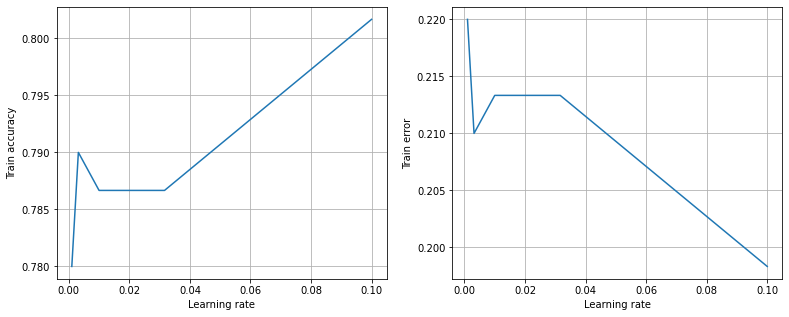

In [46]:
#print("Best learning rate found for test:\n", max(scores_lr_test, key=scores_lr_test.get))
#print("Score with best parameters for test:\n", max(scores_lr_test.values()))

# Plot accuracy ed error al variare del learning rate 
fig, ax = plt.subplots(1,2, figsize=(13,5))

ax[0].plot(lr_list, scores_lr_training.values())
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

#ax[0,1].plot(lr_list, scores_lr_test.values())
#ax[0,1].set_xlabel('Learning rate')
#ax[0,1].set_ylabel('Test accuracy')
#ax[0,1].grid(True)

ax[1].plot(lr_list, list(map(lambda x: 1-x, scores_lr_training.values())))
ax[1].set_xlabel('Learning rate')
ax[1].set_ylabel('Train error')
ax[1].grid(True)

#ax[1,1].plot(lr_list, list(map(lambda x: 1-x, scores_lr_test.values())))
#ax[1,1].set_xlabel('Learning rate')
#ax[1,1].set_ylabel('Test accuracy')
#ax[1,1].grid(True)

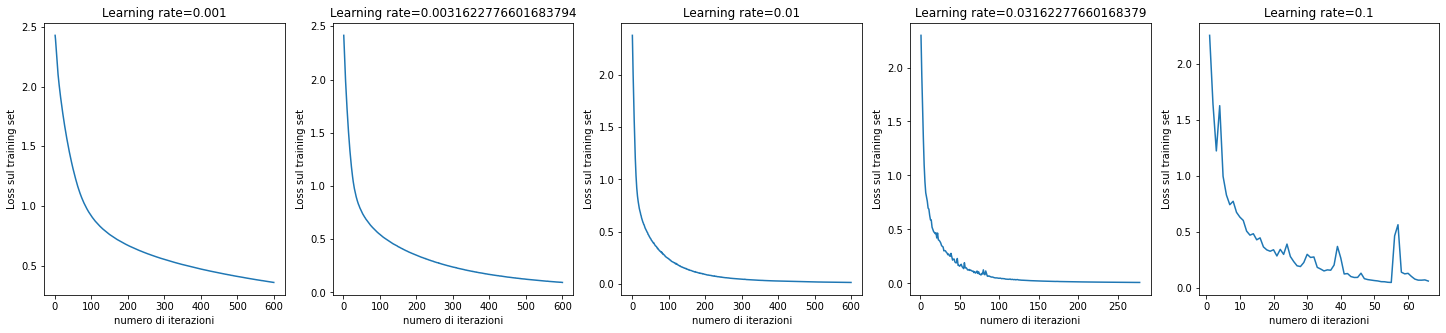

In [47]:
# adesso invece utilizzo l'oggetto loss_curve per rappresentare il training e test error in funzione del tempo per ciascun valore del learning rate. In questo modo posso osservare in quanto tempo il NN converge, sia nel training che nel test set, al minimo errore possibile ed eventualmente quando il network si allontana dal minimo a causa di overfitting (test error)

fig, ax = plt.subplots(1, len(lr_list), figsize=(25,5))
# voglio avere alla fine tre subplots corrispondenti ai diversi learning rate presenti nella lista lr_list_lc

for lr in enumerate(lr_list) :
    mlp_lc = MLPClassifier(hidden_layer_sizes=grid_hl.best_params_['hidden_layer_sizes'] , batch_size=grid_batch.best_params_['batch_size'], max_iter=600, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=lr[1]).fit(X_train, y_train)
    lc = mlp_lc.loss_curve_
    iterations = np.arange(mlp_lc.n_iter_) + 1
    ax[lr[0]].plot(iterations, lc)
    ax[lr[0]].set_xlabel('numero di iterazioni')
    ax[lr[0]].set_ylabel('Loss sul training set')
    ax[lr[0]].set_title(f'Learning rate={lr[1]}')

### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

### Answer the question 
L'algoritmo che trova il minimo della cost function è il SGD quindi il gradiente usato come step per aggiornare il valore dei pesi è scelto ad ogni passo casualmente. Questo significa che quando il passo è piccolo anche se la direzione individuata dal gradiente non è quella ottimale l'errore è stabilizzato dai passi successivi quindi la curva di learning è abbastanza "smooth". Quando invece i passi sono grandi è più probabile che una direzione sbagliata influisca tanto sull'errore causando del rumore nella curva. Nello specifico:


Quando $\alpha = 0.001$ l'algoritmo converge lentamente verso un valore ottimale del training error. Aumentando il learning rate aumenta la velocità di convergenza e dunque i passi compiuti dal NN per minimizzare la cost function e raggiungere così un minimo della funzione. Quando $\alpha = 0.003$ e $\alpha = 0.01$ la loss function presenta un'inclinazione sempre maggiore (lo si vede dalla tangente punto per  punto che ha un coefficeiente angolare più elevato), il gradiente è più grande e la convergenza è raggiunta in un minor numero di iterazioni. Il peso del gradiente si fa più rilevante per $\alpha = 0.03$ quando già per 300 iterazioni, a differenza di meno di 600 del caso precedente, la loss function converge ad un valore prossimo allo zero. Se però il learning rate $\alpha = 0.1$ assume un valore troppo elevato l'errore fluttua a causa degli step grandi con cui si muove la funzione prima di raggiungere il suo minimo. Infatti anche quando essa è prossima al minimo, saltando con step così ampi si allontana all'iterazione successiva dal minimo e necessita di ulteriori passi per convergere. Si osservano così le fluttuazioni statistiche tipiche del SGD prima di convergere (per certi seed addirittura con learning rate di 0.1 la loss non arriva a zero).

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case.


RESULTS FOR BEST NN

Best NN training error: 0.010000
Best NN test error: 0.215500


Text(0.5, 1.0, 'Hidden layers sizes=(30,), batch size=200, learning rate=0.1, samples=600')

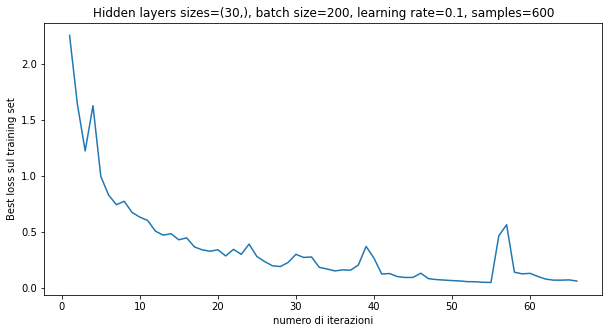

In [48]:
#get training and test error for the best NN model from CV

mlp_best = MLPClassifier(hidden_layer_sizes=grid_hl.best_params_['hidden_layer_sizes'] , batch_size=grid_batch.best_params_['batch_size'], max_iter=600, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init= grid_lr.best_params_['learning_rate_init']).fit(X_train, y_train)
# posso calcolare adesso lo score sia per il training set che per il test tramite il metodo score
training_error = 1-mlp_best.score(X_train,y_train)
test_error = 1-mlp_best.score(X_test,y_test)
print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

# adesso rappresento la learning curve per quest ultimo mlp classifier con tutte quelle caratteristiche che dovrebbero assicurare il minimo validation error
lc_best = mlp_best.loss_curve_
iterations_best = np.arange(mlp_best.n_iter_) + 1
lr_best = grid_lr.best_params_['learning_rate_init']
layer_size_best = grid_hl.best_params_['hidden_layer_sizes']
batch_size_best = grid_batch.best_params_['batch_size']

fig, ax = plt.subplots(1, figsize= (10,5))
ax.plot(iterations_best, lc_best)
ax.set_xlabel('numero di iterazioni')
ax.set_ylabel('Best loss sul training set')
ax.set_title(f'Hidden layers sizes={layer_size_best}, batch size={batch_size_best}, learning rate={lr_best}, samples={600}')

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [49]:
X_more = X[permutation]
y_more = y[permutation]

m_training_more = 4000

X_train_more, X_test_more = X_more[:m_training_more], X_more[m_training_more:]
y_train_more, y_test_more = y_more[:m_training_more], y_more[m_training_more:]

labels_more, freqs_more = np.unique(y_train_more, return_counts=True)
print("Labels in training dataset: ", labels_more)
print("Frequencies in training dataset: ", freqs_more)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [403 389 414 394 409 405 385 406 392 403]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [50]:
# use best architecture and params from before

mlp_best_more = MLPClassifier(hidden_layer_sizes=grid_hl.best_params_['hidden_layer_sizes'] , batch_size=grid_batch.best_params_['batch_size'], max_iter=50, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init= grid_lr.best_params_['learning_rate_init'], verbose = True).fit(X_train_more, y_train_more)

training_error_more = 1-mlp_best.score(X_train_more,y_train_more)
test_error_more = 1-mlp_best.score(X_test_more,y_test_more)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error_more)
print ("Best NN test error: %f" % test_error_more)


Iteration 1, loss = 1.38584864
Iteration 2, loss = 0.72241041
Iteration 3, loss = 0.58600185
Iteration 4, loss = 0.52080090
Iteration 5, loss = 0.50033793
Iteration 6, loss = 0.44653091
Iteration 7, loss = 0.43413002
Iteration 8, loss = 0.39642472
Iteration 9, loss = 0.38628405
Iteration 10, loss = 0.38110070
Iteration 11, loss = 0.35702140
Iteration 12, loss = 0.35324662
Iteration 13, loss = 0.32007830
Iteration 14, loss = 0.34531545
Iteration 15, loss = 0.30710115
Iteration 16, loss = 0.28518834
Iteration 17, loss = 0.27963029
Iteration 18, loss = 0.28006096
Iteration 19, loss = 0.25595313
Iteration 20, loss = 0.25568515
Iteration 21, loss = 0.26209178
Iteration 22, loss = 0.23243485
Iteration 23, loss = 0.23346928
Iteration 24, loss = 0.23841780
Iteration 25, loss = 0.23692964
Iteration 26, loss = 0.22249036
Iteration 27, loss = 0.20397761
Iteration 28, loss = 0.18947185
Iteration 29, loss = 0.18879931
Iteration 30, loss = 0.19477804
Iteration 31, loss = 0.23077177
Iteration 32, los

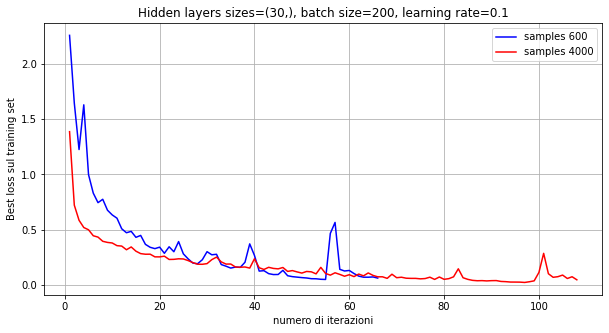

In [51]:
# rappresento la learning curve anche per questo caso con più samples (uso lo stesso numero di iterazioni, 600, per confrontare la loss a cui giungono entrambi nello stesso istante).

mlp_best_more_lc = MLPClassifier(hidden_layer_sizes=grid_hl.best_params_['hidden_layer_sizes'] , batch_size=grid_batch.best_params_['batch_size'], max_iter=600, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init= grid_lr.best_params_['learning_rate_init']).fit(X_train_more, y_train_more)

lc_best_more = mlp_best_more_lc.loss_curve_
iterations_best_more = np.arange(mlp_best_more_lc.n_iter_) + 1

fig, ax = plt.subplots(1, figsize= (10,5))

ax.plot(iterations_best, lc_best, 'b', label='samples 600')
ax.plot(iterations_best_more, lc_best_more, 'r', label='samples 4000')
ax.set_xlabel('numero di iterazioni')
ax.set_ylabel('Best loss sul training set')
ax.set_title(f'Hidden layers sizes={layer_size_best}, batch size={batch_size_best}, learning rate={lr_best}')
ax.grid(True)
ax.legend()

## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

### Answer the question 
Prima di elencare e commentare i risultati osservo il grafico della precedente cella a proposito della learning curve con diverso numero di samples. Non stiamo confrontando la possibilità o meno che i due modelli conducano ad overfitting bensì la velocità di convergenza dell'algoritmo. Aumentando il numero di samples si rende il training set più rappresentativo della realtà e l'algoritmo riesce a convergere più velocemente al minimo della cost function poichè sono di più i samples con i quali si può allenare in ciascuna iterazione e con i quali imparare a classificare.


I risultati ottenuti in termini di errori sono i seguenti:

-samples $=600$ il training error è zero mentre il test è circa $\approx 0.22$;

-samples $=4000$ il training error è $\approx 0.225$ e il test $\approx 0.21$.

Quando i dati per l'allenamento sono pochi allora è più probabile che l'algoritmo trovi delle correlazioni spurie e casuali tra i dati conducendo ad overfitting perchè ha ristretto il proprio apprendimento alle caratteristiche dei samples durante il training. Il test set in questo caso, come ci si aspetta, è maggiore di zero in quanto il NN sta mettendo alla prova ciò che ha imparato su samples a lui del tutto nuovi.
Quando i dati per l'allenamento sono di più allora il rischio di overfitting diminuisce perchè si aggiunge "variabilità" (variance) al set rendendolo più omogeneo. Di conseguenza il training error non è zero ma 0.2 e il test set è talvolta leggermente inferiore rispetto al training sintomo di una buona generalizzazione del modello (infatti si vedrà dalla matrice di confusione che quegli elementi diagonali che con SVM avevano score inferiori al resto tramite MLPC raggiungono valori migliori), oppure lievemente maggiore come ci aspetteremmo dalla teoria.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


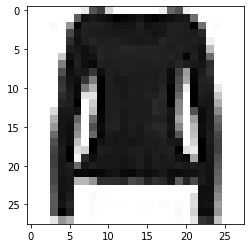

LABEL: 2
LABEL misclassified by NN prediction:  0


In [52]:
# i due vettori di labels predicted avranno dimensione differente pertanto devo scorrere attraverso quello con un numero inferiore di elementi (cioè NN_prediction) e confrontare così i due array che ottengo 
NN_prediction = mlp_best.predict(X_test)
large_NN_prediction = mlp_best_more.predict(X_test_more)

for i in range(len(NN_prediction)) :
    if NN_prediction[i] != large_NN_prediction[i] and large_NN_prediction[i] == y_test_more[i] :
        plot_input(X_test_more,y_test_more,i)
        print('LABEL misclassified by NN prediction: ',NN_prediction[i])
        break

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


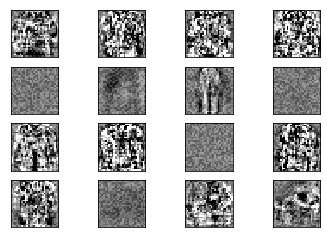

Weights with 4000 data points:


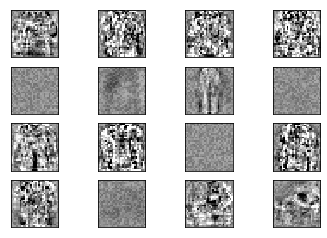

In [53]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_best.coefs_[0].min(), mlp_best.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_best_more.coefs_[0].min(), mlp_best_more.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

### Answer the question 
Innanzitutto bisogna capire che cosa si osserva rappresentando gli array dei pesi in un quadrato 28 pixel per 28. Se avessimo un network con un hidden layer soltanto partendo da dati bidimensionali, quindi weights costituiti da un bias e da un vettore normale ad una retta otterremmo una serie di neuroni nel layer centrale pari a tanti classificatori halfspaces. Nel layer in output potremmo utilizzare una funzione di attivazione corrispondente all'and logico per intersecare gli n halfspaces dell'hidden layer rappresentando così un poligono con n-1 facce (uno dei neuroni costituisce il bias). Se potessimo rappresentare allora l'halfspace definito dell'ultimo neurone in output, cioè tramite i pesi che collegano l'hidden layer con l'output allora osserveremmo un poligono quindi una forma dipendente da quanti neuroni costituiscono il layer centrale. Nel nostro caso però non abbiamo cambiato la funzione di attivazione dell'output bensì abbiamo lasciato quella predefinita nella funzione di sklearn. Inoltre il fatto di poter osservare un poligono a n-1 facce era anche dovuto al fatto di aver scelto dei dati bidimensionali (se fossero tridimensionali ci sposteremmo in R3) e quindi rappresentabili sul piano. I decision boudaries del modello sarebbero visibili perchè i dati possiedono una dimensione adatta per essere raffigurati. Nel problema che stiamo considerando invece partiamo da immagini encoded in array di 784 bits (28x28) che soltanto inizialmente possiamo rappresentare tramite scala di grigi come delle immagini con risoluzione 28x28 pixels. La funzione atta a plottare i pesi del NN in pratica non fa altro che raccogliere la matrice di weights 784x30 (numero di elementi in input per numero di neuroni nell'hidden layer) farne la trasposta e rappresentare le righe (sono scelte le prime 16 su 30 disponibili) di quest ultima come immagini. Ciascuna di loro è infatti formata da 784 elementi da riorganizzare, tramite reshape,in quadri da 28x28. Che cosa si osserva rappresentando questi pesi? Il plot che otteniamo è lo stesso di quello che in teoria abbiamo descritto per il NN con input bidimensionali?

Le due situazion sono diverse perchè:
Nel network sopra citato non rappresentiamo i pesi bensì i decision boundaries e dunque gli halfspaces (o intersezione di halfspaces) che classificano un punto appartenente ad una categoria rispetto ad un altra. Utilizzando i pesi invece si osservano proprio delle figure, non sempre, che ricalcano i vestiti che vogliamo classificare. I weights utilizzati però sono quelli che collegano il layer di input con quello hidden. Perchè non consideriamo quelli che invece conducono ai dieci neuroni di output, cioè ai dieci classificatori che stabiliscono in quale percentuale un vestito sia una maglietta o ad esempio un pullover?
Le due tipologie di pesi sono diversi, sia per ciò che rappresentano sia per la loro struttura. Gli ultimi infatti sono dieci vettori di trenta elementi ciascuno, essi sono i parametri dell'iperpiano in uno spazio multidimensionale che determina i confini entro i quali un vestito venga classificato dall'algoritmo; i primi invece sono vettori che hanno lo stesso numero di componenti delle immagini iniziali infatti sono usati nelle somme pesate di ognuno dei trenta neuroni centrali per determinare ciascuno di questi "perceptron". Inoltre si nota come non in tutti i grafici è possibile riconoscere un vestito questo perchè i pesi potrebbero avere un valore più o meno marcato nelle somme pesate per far si che i dati in input, e quindi l'informazione sulla forma dei vestiti, siano trasportati nell'hidden layer. E' quasi una casualità che il network riconosca fin da subito determinati vestiti permettendo di osservare dal grafico oggetti che vi somiglino. I neuroni centrali infatti sono trenta e potrebbero attenzionare diverse parti di uno stesso vestito (non rendendo riconoscibile il vestito stesso dall'immagine) oppure essere direttamente rappresentativi di un intera forma. Questi ultimi sono quelli che si vedono dai riquadri che sono raffigurati. Aumentando il numero di samples essi si fanno più nitidi nei bordi e con meno rumore mentre gli altri riquadri che contenevano figure non interpretabili geometricamente si schiariscono oppure quelli con del rumore rimangono tali.
Eseguendo con un diverso seed il notebook mi rendo conto di come sia molto probabile osservare dei riquadri con solo del rumore. Il network in maniera del tutto random "decide" cosa mostrare nel layer successivo tramite i pesi, si possono vedere delle forme d vestiti e con eguale probabilità figure del tutto rumorose e non interpretabili. 

Con il seed scelto in questo momento ad esempio osservo 9 dei 16 riquadri rappresentati con un cappotto, una scarpa e un cappotto visto più da vicino. Il network casualmente ha trasportato nei neuroni dell'hidden layer già alcuni "stampi" di vestiti da usare per il riconoscimento degli input.  

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

Utilizzo lo stesso numero di samples che ho considerato per il primo neural network

In [54]:

best_SVM = SVC(kernel='rbf', C=5, gamma=0.005).fit(X_train_more, y_train_more)

print ('RESULTS FOR SVM')

training_error_svm = 1-best_SVM.score(X_train_more, y_train_more)
test_error_svm = 1-best_SVM.score(X_test_more, y_test_more)

print("Training score SVM:")
print(training_error_svm)

print("Test score SVM:")
print(test_error_svm)

RESULTS FOR SVM
Training score SVM:
0.07299999999999995
Test score SVM:
0.1440892857142857


In [55]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1) 
logreg.fit(X_train_more, y_train_more) 

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error_logreg =  1-logreg.score(X_train_more, y_train_more)
test_error_logreg =  1-logreg.score(X_test_more, y_test_more)

print ("Training error (reg): %f" % training_error_logreg)
print ("Test error (reg): %f" % test_error_logreg)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.071000
Test error (reg): 0.172393


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

### Answer the question 
Confrontando i test error dei ottenuti dai tre modelli si osserva che:

-SVM test error$=0.14$;

-LOGREG test error$=0.17$;

-MLPC test error$=0.21$.

Il migliore è il classificatore SVM con kernel gaussiano. Il NN non è in grado di raggiungere questi risultati a causa della sua architettura delle connessioni all to all in quanto in questo caso avremmo potuto usare un convolutional NN per dare più importanza (tramite i pesi) ai pixel adiacenti trattandosi di immagini e usare anche il pooling per semplificare il riconoscimento dei dettagli nelle immagini diminuendone la risoluzione e attenzionando di più la forma complessiva del vestito che come visto nella confusion matrix di SVM determina le maggiori differenze di classificazione tra oggetti diversi tra loro.

 ## Confusion matrix 
Anche in questo caso vorrei rappresentare la matrice di confusione e confrontarla con quella del metodo SVM e LR del precedente laboratorio. Utilizzo il best neural network 4000 samples nel training set, è probabile che a causa dell'overfitting alcuni score siano minori rispetto a quelli del support vector machine in quanto il modello si è adattato eccessivamente bene al training set generando un maggiore errore nella classificazione dei samples nel test set.  


Labels and frequencies in test set:  [5597 5611 5586 5606 5591 5595 5615 5594 5608 5597]


Text(69.0, 0.5, 'predicted label')

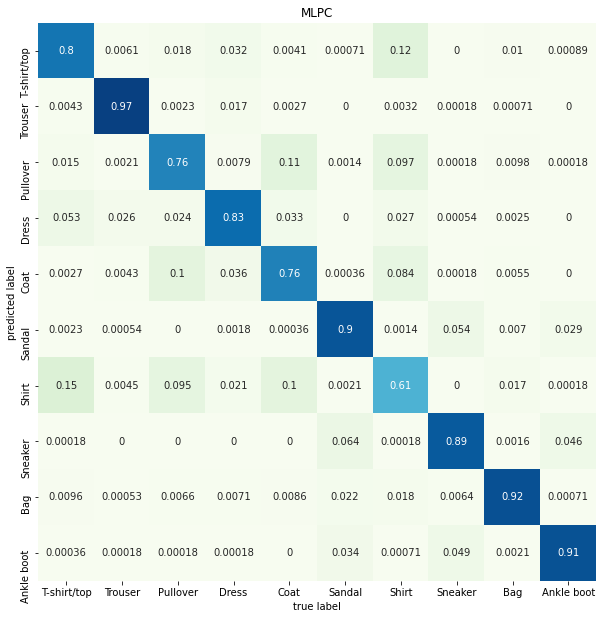

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
np.set_printoptions(precision=2, suppress=True) 

u, counts = np.unique(y_test_more, return_counts=True)
print("Labels and frequencies in test set: ", counts)
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
confusion_mlp = confusion_matrix(y_test_more, mlp_best_more.predict(X_test_more))/counts[:,None]

fig, ax1 = plt.subplots(1, figsize=(10,20))
ax = sns.heatmap(confusion_mlp, square=True, annot=True, cbar=False, cmap='GnBu', xticklabels=labels, yticklabels=labels, ax=ax1)
ax.set_title('MLPC')
ax.set_xlabel('true label')
ax.set_ylabel('predicted label')